# Лабораторная работа по вычислительной математике.

Карцев Вадим, группа Б01-909, пункт О)

# Задание уравнения
Зададим уравнение в виде матрицы коэффициентов со столбцом свободных членов.

In [ ]:
import numpy as np
a, b = 10, 10
n = 100

In [ ]:
def create_matrix(a, b, n):
  matrix = np.zeros((n, n+1))

  for num, line in enumerate(matrix):
    if 0 <= num - 1 < n:
      line[num - 1] = 1
      
    if 0 <= num < n:
      line[num] = a

    if 0 <= num + 1 < n:
      line[num + 1] = 1

    if 0 <= num + 2 < n:
      line[num + 2] = 1 / b

    line[-1] = num + 1

  return matrix

equation = create_matrix(a, b, n)
print(equation)

[[ 10.    1.    0.1 ...   0.    0.    1. ]
 [  1.   10.    1.  ...   0.    0.    2. ]
 [  0.    1.   10.  ...   0.    0.    3. ]
 ...
 [  0.    0.    0.  ...   1.    0.1  98. ]
 [  0.    0.    0.  ...  10.    1.   99. ]
 [  0.    0.    0.  ...   1.   10.  100. ]]


# Создание вспомогательных функций

Так же создадим функцию `print_roots` для более компактного и читаемого представления результатов вычислений.

In [ ]:
def print_roots(roots, columns = 5):
  if roots[0] is not float or int:
    roots = roots[0]
  max_string_len = 0
  roots_strings = []
  for root_num, root in enumerate(roots, start=1):
    root_string = f"x{root_num} = {root}"
    if len(root_string) > max_string_len:
      max_string_len = len(root_string)

    roots_strings.append(root_string)

  rows = len(roots) // columns if len(roots) % columns == 0 else len(roots) // columns + 1

  for row_num in range(rows):
    row_string = ""
    for column_num in range(0, columns):
      root_num = column_num * rows + row_num
      if root_num < len(roots_strings):
        root_string = roots_strings[root_num]
        row_string += "    " + root_string + " " * (max_string_len - len(root_string) + 4)

    print(row_string)

# Рассчет корней по методу Гаусса

Метод Гаусса работает в два прохода - прямой и обратный. Напишем необходимые функции и рассчитаем корни СЛУ


## Прямой ход

В прямом проходе мы приводим матрицу к верхнетреугольному виду, вычитая n-ю строку из n+1, n+2 и т.д. с определенными коэффициентами для зануления n-ого элемента этих строк.

In [ ]:
def gauss_direct(equation):
  for base_line_num, base_line in enumerate(equation):
    for common_line_num, common_line in enumerate(equation[base_line_num + 1::], start = base_line_num + 1):
      multiplier = common_line[base_line_num] / base_line[base_line_num]
      common_line -= multiplier * base_line

  return equation

## Обратный ход

Так же создадим метод для обратного хода. В нем мы таким же образом, но в обратном порядке, приводим матрицу к нижнетреугольному виду. Но так как матрица уже была приведена к верхнетреугольному виду, останется только главная диагональ.

In [ ]:
def gauss_back(equation):
  for base_line_num, base_line in reversed(list(enumerate(equation))):
    for common_line_num, common_line in reversed(list(enumerate(equation[:base_line_num:]))):
      multiplier = common_line[base_line_num] / base_line[base_line_num]
      common_line -= multiplier * base_line
      
  return equation

## Нормировка

Далее для удобства анализа результатов нормируем матрицу. Тогда получится матрица вида

$$
  \left(
    \begin{array}{cccc|c}
      1 & 0 & \ldots & 0 & a_1 \\
      0 & 1 & \ldots & 0 & a_2 \\
      \vdots & \vdots & \ddots & \vdots & \vdots \\
      0 & 0 & \ldots & 1 & a_n
    \end{array}
  \right) \Leftrightarrow
  \left\{
    \begin{array}{lr}
      x_1 = a_1 \\
      x_2 = a_2 \\
      \vdots \\
      x_n = a_n
    \end{array}
  \right.
$$

Таким образом, сразу получаем ответ, отделив после всех преобразований последний столбец.

In [ ]:
def gauss_normalize(equation):
  for line_num, line in enumerate(equation):
    line /= line[line_num]

  return equation

Создадим сводную функцию, которая не даст испортить матрицу СЛУ и сразу выдаст все корни СЛУ в виде массива.

In [ ]:
def gauss_method(equation):
  equation_upper_triangular = gauss_direct(equation.copy())
  equation_diagonal = gauss_back(equation_upper_triangular.copy())
  equation_normalize = gauss_normalize(equation_diagonal.copy())

  return np.transpose(equation_normalize[:, -1:])

## Результаты

Вызовем функцию и распечатаем все корни с помощью написанной ранее функции.

In [ ]:
roots_gauss = gauss_method(equation)
print("С помощью метода Гаусса были получены следующие корни СЛУ")
print_roots(roots_gauss)

С помощью метода Гаусса были получены следующие корни СЛУ
    x1 = 0.08114061881585005        x21 = 1.7341711631719146        x41 = 3.387063725155385         x61 = 5.039956287138857         x81 = 6.692848849122326     
    x2 = 0.16393716688650098        x22 = 1.816815791271088         x42 = 3.4697083532545596        x62 = 5.1226009152380305        x82 = 6.775493477221501     
    x3 = 0.24656644954998494        x23 = 1.8994604193702618        x43 = 3.552352981353733         x63 = 5.205245543337203         x83 = 6.858138105320674     
    x4 = 0.329212627691554          x24 = 1.9821050474694353        x44 = 3.634997609452906         x64 = 5.287890171436377         x84 = 6.940782733419847     
    x5 = 0.4118570992209516         x25 = 2.0647496755686086        x45 = 3.7176422375520795        x65 = 5.370534799535551         x85 = 7.023427361519022     
    x6 = 0.4945017431352376         x26 = 2.1473943036677823        x46 = 3.800286865651254         x66 = 5.4531794276347245        x86 =

# Рассчет корней по методу Зейделя

Теперь решим это уравнение с помощью итерационного метода

## Нормализация

Для начала нормализуем расширенную матрицу СЛУ по главной диагонали. Это нужно для того чтобы выразить корни $x_1$, $x_2$, ... $x_n$ через соответствующие строки матрицы, для того чтобы в дальнейшем легко рассчитывать $x^{(k+1)}$ через $x^{(k)}$ с помощью простого умножения матриц.

In [ ]:
def normalize_diag(matrix):
  result = matrix.copy()
  for line_num, line in enumerate(result):
    line /= line[line_num]

  return result

## Выделение столбца свободных членов и матрицы коэффициентов

С помощью среза разделим расширенную матрицу на две.

In [ ]:
def separate(equation):
  return equation[:, :-1], equation[:, -1:]

## Написание метода

В итерационном методе Зейделя мы будем рассчитывать $(k + 1)$ - ую "пачку" корней через $k$ - ую по формуле

$$
  x^{(k+1)} = F - A \cdot x^{(k)}
$$

где $F$ - столбец свободных членов, а $A$ - матрица коэффициентов с зануленной главной диагональю. Указанная выше может быть записана в виде

$$
  \left\{
    \begin{array}{lr}
      x_1 = f_1 - a_2 x_2 - a_3 x_3 - \ldots - a_n x_n \\
      x_2 = f_2 - a_1 x_1 - a_3 x_3 - \ldots - a_n x_n \\
      \vdots \\
      x_n = f_n - a_1 x_1 - a_2 x_2 - \ldots - a_{n-1} x_{n-1} \\
    \end{array}
  \right.
$$

где $f_i$ - свободные члены, $a_i$ - коэффициенты при соответствующих переменных.

In [ ]:
def seidel_method(equation, accuracy = 0.001, metrics_function = lambda x, y: max(abs(x - y)), limit = None):
  normalized = normalize_diag(equation)
  coefficient, F = separate(normalized)
  coefficient -= np.eye(len(coefficient))

  roots = np.zeros((len(coefficient), 1))
  previous_roots = roots
  steps_count = 0
  while True and (limit == None or steps_count < limit):
    previous_roots = roots
    roots = F - np.dot(coefficient, roots)
    steps_count += 1

    if metrics_function(roots, previous_roots) < accuracy:
      break

  return np.transpose(roots), steps_count

## Результаты

In [ ]:
accuracy = 0.0000001
roots_seidel, steps = seidel_method(equation, accuracy=accuracy)
print(f"За {steps} шагов итерационного метода Зейделя мы добились точности {accuracy} и получили следующие корни:")
print_roots(roots_seidel)

За 13 шагов итерационного метода Зейделя мы добились точности 1e-07 и получили следующие корни:
    x1 = 0.08114061900877545        x21 = 1.734171166008789         x41 = 3.3870637305455222        x61 = 5.039956295082256         x81 = 6.692848859618989     
    x2 = 0.16393716724739205        x22 = 1.8168157942356258        x42 = 3.469708358772359         x62 = 5.1226009233090934        x82 = 6.775493487845825     
    x3 = 0.2465664500624007         x23 = 1.8994604224624623        x43 = 3.5523529869991957        x63 = 5.2052455515359295        x83 = 6.858138116072656     
    x4 = 0.3292126283449187         x24 = 1.982105050689299         x44 = 3.634997615226033         x64 = 5.287890179762766         x84 = 6.94078274429944      
    x5 = 0.4118571000091007         x25 = 2.0647496789161357        x45 = 3.717642243452869         x65 = 5.3705348079896025        x85 = 7.023427372525994     
    x6 = 0.494501744054486          x26 = 2.1473943071429726        x46 = 3.8002868716797056       

## Сравнительный анализ метрик точности

Кроме того, попробуем использовать другую метрику для определения точности полученных результатов. Например, будем вычислять точность как среднее разности всех решений относительно самих решений по формуле

$$
  \varepsilon = \overline{|x_i^{(k+1)} - x_i^{(k)}|}
$$

Для этого напишем новую функцию метрики и передадим методу Зейделя через параметр `metrics_function`

In [ ]:
def metrics_average(a, b):
  return np.mean(abs(a - b) / abs(a))

roots_seidel, steps_count = seidel_method(equation, accuracy=accuracy, metrics_function=metrics_average)
print(f"За {steps} шагов итерационного метода Зейделя мы добились точности {accuracy} по новой метрике и получили следующие корни:")
print_roots(roots_seidel)

За 13 шагов итерационного метода Зейделя мы добились точности 1e-07 по новой метрике и получили следующие корни:
    x1 = 0.08114061791361127        x21 = 1.7341711497208854        x41 = 3.3870636995459633        x61 = 5.039956249371041         x81 = 6.6928487991961205    
    x2 = 0.16393716519726625        x22 = 1.8168157772121394        x42 = 3.469708327037218         x62 = 5.122600876862297         x82 = 6.775493426687374     
    x3 = 0.24656644714979353        x23 = 1.899460404703393         x43 = 3.5523529545284713        x63 = 5.20524550435355          x83 = 6.8581380541786325    
    x4 = 0.32921262462674694        x24 = 1.982105032194647         x44 = 3.634997582019726         x64 = 5.287890131844804         x84 = 6.940782681669923     
    x5 = 0.41185709551979766        x25 = 2.064749659685901         x45 = 3.7176422095109793        x65 = 5.370534759336058         x85 = 7.023427309161496     
    x6 = 0.4945017388122165         x26 = 2.1473942871771547        x46 = 3.800286

Итак, в нашем случае данные метрики оказались сравнимыми по эффективности, однако при наличии корней заметно разного порядка данная метрика будет более эффективна для ускорения алгоритма.

# Сравнение результатов методов Гаусса и Зейделя

Кроме того, посмотрим на относительную погрешность метода Зейделя относительно метода Гаусса в зависимости от количества итераций. Для этого будем рассматривать среднюю ошибку для всех корней по формуле

$$
  \varepsilon = \overline{|x_i^G - x_i^S|}
$$

где $x_i^G$ - $i$-ый корень рассчитанный по методу Гаусса, а $x_i^S$ - $i$-ый корень рассчитанный по методу Зейделя.

При 1 итерациях погрешность составляет 21%
При 2 итерациях погрешность составляет 4.4%
При 3 итерациях погрешность составляет 0.93%
При 4 итерациях погрешность составляет 0.2%
При 5 итерациях погрешность составляет 0.041%
При 6 итерациях погрешность составляет 0.0086%
При 7 итерациях погрешность составляет 0.0018%
При 8 итерациях погрешность составляет 0.00038%
При 9 итерациях погрешность составляет 8e-05%
При 10 итерациях погрешность составляет 1.7e-05%
При 11 итерациях погрешность составляет 3.6e-06%
При 12 итерациях погрешность составляет 7.5e-07%
При 13 итерациях погрешность составляет 1.6e-07%
При 14 итерациях погрешность составляет 3.3e-08%
При 15 итерациях погрешность составляет 7e-09%
При 16 итерациях погрешность составляет 1.5e-09%
При 17 итерациях погрешность составляет 3.1e-10%
При 18 итерациях погрешность составляет 6.5e-11%
При 19 итерациях погрешность составляет 1.4e-11%
При 20 итерациях погрешность составляет 2.9e-12%
При 21 итерациях погрешность составляет 6.1e-13%
При 

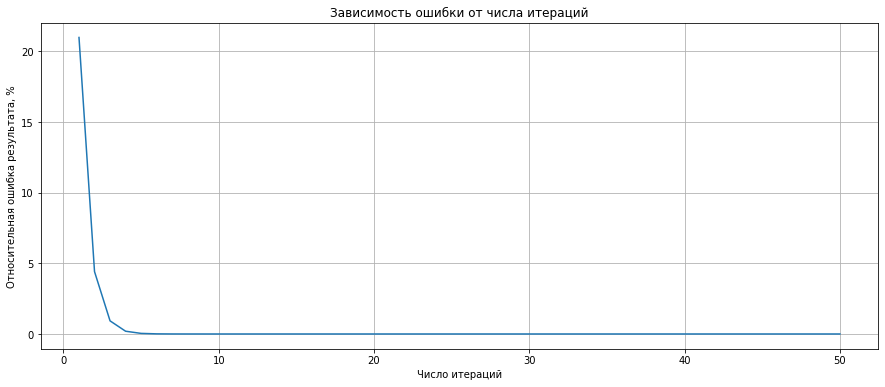

In [ ]:
from matplotlib import pyplot as plt

steps_band = []
error_band = []
for steps_count in range(1, 51):
  roots_seidel, steps = seidel_method(equation, accuracy=0, limit=steps_count)
  epsilon = np.mean(abs(roots_seidel - roots_gauss) / abs(roots_gauss))

  print(f"При {steps} итерациях погрешность составляет {epsilon * 100:.2g}%")

  steps_band.append(steps_count)
  error_band.append(epsilon * 100)

plt.figure(figsize=[15,6])
plt.xlabel("Число итераций")
plt.ylabel("Относительная ошибка результата, %")
plt.title("Зависимость ошибки от числа итераций")
plt.plot(steps_band, error_band)
plt.grid()

# Сравнение скорости выполнения для данных методов

Сравним, с какой скоростью алгоритм выполняется для СЛУ разного размера и построим графики

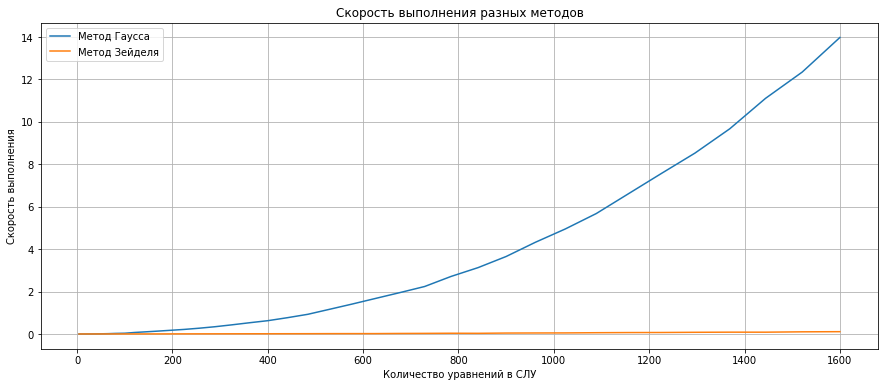

In [ ]:
import time

size_band = []
gauss_times = []
seidel_times = []

for equation_size in [k ** 2 for k in range(2, 41)]:
  equation = create_matrix(a, b, equation_size)

  start_gauss = time.time()
  gauss_method(equation)
  end_gauss = time.time()

  start_seidel = time.time()
  seidel_method(equation, accuracy=accuracy)
  end_seidel = time.time()

  size_band.append(equation_size)
  gauss_times.append(end_gauss - start_gauss)
  seidel_times.append(end_seidel - start_seidel)

plt.figure(figsize=[15, 6])
plt.title("Скорость выполнения разных методов")
plt.xlabel("Количество уравнений в СЛУ")
plt.ylabel("Скорость выполнения")

plt.plot(size_band, gauss_times, label="Метод Гаусса")
plt.plot(size_band, seidel_times, label="Метод Зейделя")

plt.legend()
plt.grid()

Как можно заметить из графиков, метод Гаусса заметно уступает по скорости методу Зейделя, из чего можно сделать вывод, что для больших систем иногда имеет смысл пренебречь точностью решения и получить результат за значительно меньшее время.

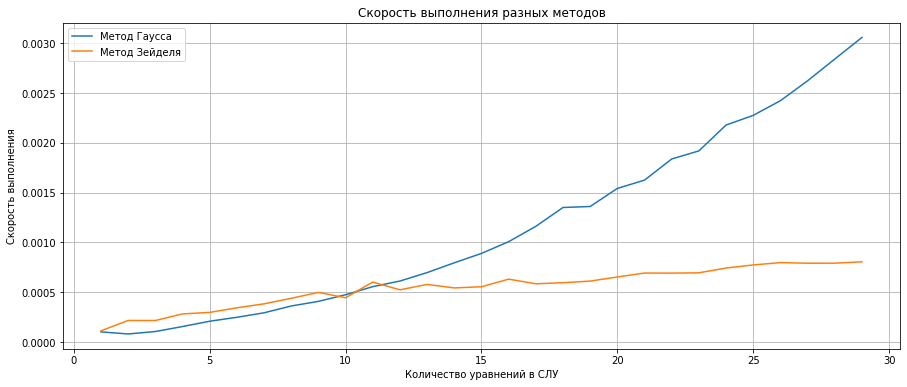

In [ ]:
size_band_min = []
gauss_times_min = []
seidel_times_min = []

for equation_size in range(1, 30):
  equation = create_matrix(a, b, equation_size)

  start_gauss = time.time()
  gauss_method(equation)
  end_gauss = time.time()

  start_seidel = time.time()
  seidel_method(equation, accuracy=accuracy)
  end_seidel = time.time()

  size_band_min.append(equation_size)
  gauss_times_min.append(end_gauss - start_gauss)
  seidel_times_min.append(end_seidel - start_seidel)

plt.figure(figsize=[15, 6])
plt.title("Скорость выполнения разных методов")
plt.xlabel("Количество уравнений в СЛУ")
plt.ylabel("Скорость выполнения")

plt.plot(size_band_min, gauss_times_min, label="Метод Гаусса")
plt.plot(size_band_min, seidel_times_min, label="Метод Зейделя")

plt.legend()
plt.grid()

Однако при рассмотрении графика для малых размеров можно заметить что для малых размеров СЛУ метод Гаусса может быть эффективнее. Так, для решения большого количества небольших СЛУ эффективнее предпочесть метод Гаусса.

# Выводы

Как можно заметить из графика и текстового вывода, погрешность метода Зейделя очень быстро уменьшается с увеличением количества итераций метода, а начиная с 28ой итерации точность упирается в точность работы с вещественными числами в python, так как начинает периодически уменьшаться и увеличиваться, что значит, что мы находимся в чрезвычайно малой окрестности искомого числа, но не можем попасть точно в него, прыгая между ближайшими значениями.

Кроме того, метод Зейделя так же показал своё несомненное превосходство в скорости работы, так как, например, для системы из 10000 уравнений он выполняется с достаточной точностью за 2 секунды, в то время как метод Гаусса искал корни СЛУ в течении примерно 400 секунд.